이번 챕터에서는 파이토치를 사용해서 다층 퍼셉트론을 구현하여 XOR 문제를 풀어보는 것을 시도해보겠습니다.

# 1. 파이토치로 다층 퍼셉트론 구현하기

---

In [1]:
import torch
import torch.nn as nn

GPU 연산이 가능하다면 GPU 연산을 하도록 하고, 랜덤 시드를 고정해줍니다.

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

XOR 문제를 풀기 위한 입력과 출력을 정의해줍니다.

In [3]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

이제 다층 퍼셉트론을 설계합니다. 아래는 입력층, 은닉층1, 은닉층2, 은닉층3, 출력층을 가지는 은닉층이 3개인 인공 신경망입니다.

In [4]:
model = nn.Sequential(
          nn.Linear(2, 10, bias=True), # input_layer = 2, hidden_layer1 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer1 = 10, hidden_layer2 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer2 = 10, hidden_layer3 = 10
          nn.Sigmoid(),
          nn.Linear(10, 1, bias=True), # hidden_layer3 = 10, output_layer = 1
          nn.Sigmoid()
          ).to(device)

위 인공 신경망을 그림으로 표현하면 아래와 같습니다.

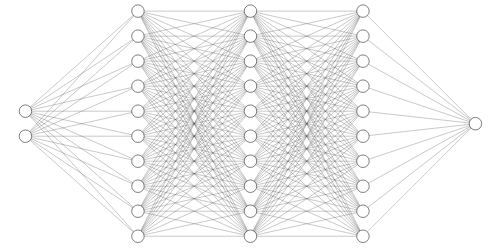

이제 비용 함수와 옵타마이저를 선언합니다. nn.BCELoss()는 이진 분류에서 사용하는 크로스엔트로피 함수입니다.

In [5]:
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)  # modified learning rate from 0.1 to 1

총 10,001번의 에포크를 수행합니다. 각 에포크마다 역전파가 수행된다고 보면 되겠습니다.

In [6]:
for epoch in range(10001):
    optimizer.zero_grad()
    # forward 연산
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    # 100의 배수에 해당되는 에포크마다 비용을 출력
    if epoch % 100 == 0:
        print(epoch, cost.item())

0 0.6948983669281006
100 0.693155825138092
200 0.6931535601615906
300 0.6931514143943787
400 0.6931493282318115
500 0.6931473016738892
600 0.6931453943252563
700 0.6931434869766235
800 0.6931416988372803
900 0.6931397914886475
1000 0.6931380033493042
1100 0.6931361556053162
1200 0.6931343078613281
1300 0.6931324005126953
1400 0.6931304931640625
1500 0.6931284666061401
1600 0.6931264400482178
1700 0.6931242942810059
1800 0.6931220889091492
1900 0.6931197047233582
2000 0.6931172013282776
2100 0.6931145191192627
2200 0.6931115984916687
2300 0.6931084990501404
2400 0.6931051015853882
2500 0.6931014657020569
2600 0.6930974125862122
2700 0.6930930018424988
2800 0.6930879950523376
2900 0.6930825114250183
3000 0.6930763721466064
3100 0.6930692791938782
3200 0.6930612325668335
3300 0.6930519342422485
3400 0.6930410861968994
3500 0.6930283904075623
3600 0.6930133700370789
3700 0.6929951906204224
3800 0.6929728984832764
3900 0.6929453015327454
4000 0.6929103136062622
4100 0.6928649544715881
4200 

비용이 최소화 되는 방향으로 가중치와 편향이 업데이트 됩니다.

위는 100배수의 에포크마다 비용이 줄어드는 과정을 보여줍니다.

# 2. 학습된 다층 퍼셉트론의 예측값 확인하기

---

이제 모델이 XOR 문제를 풀 수 있는지 테스트 해봅시다.

In [7]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[1.11730085e-04]
 [9.99828696e-01]
 [9.99842167e-01]
 [1.85339333e-04]]
모델의 예측값(Predicted):  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0


실제값은 0, 1, 1, 0이며 예측값은 0, 1, 1, 0으로 문제를 해결하는 모습을 보여줍니다.